In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
os.chdir(r"D:\1.Work\WorkStation\WorkSpace\Projects\Customer-Churn-Prediction")  # Set the working directory to the project folder to avoid issues with file paths
cwd = os.getcwd()
file_path = os.path.join(cwd, "data", "raw", "customer_churn_large_dataset.xlsx")

data = pd.read_excel(file_path)

In [11]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
# No Null values
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [12]:
data.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [ ]:
# No duplicate values
data.duplicated().sum()

0

In [ ]:
# Looking at the distribution of the target variable 'Churn'
# As the data is almost 50% balanced, any kind of classifier can be used
# Will be using Random Forest and XGBoost Model 
data['Churn'].value_counts()

## EDA

### Outlier Detection and Scaling

<Axes: xlabel='Age', ylabel='Count'>

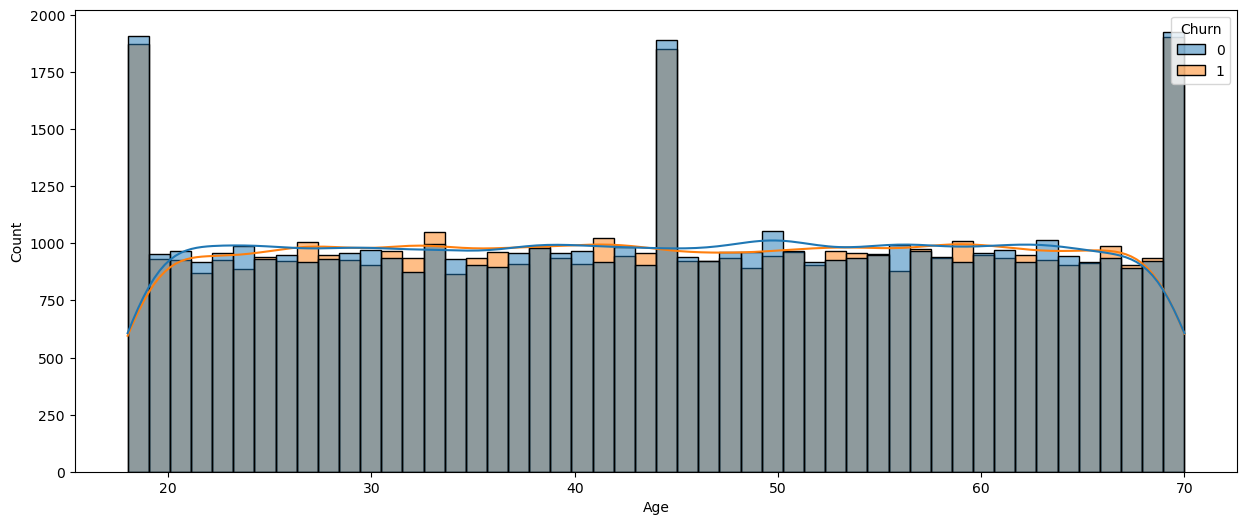

In [ ]:
# Looking at the Age Column, we can see that only some of the ages have very high number follow uniform distribution
# Also the distribution of the ages in terms of churn is almost similar, which means age is not a very important feature for the model to predict the churn

fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=data,x='Age', bins=50, kde=True,hue='Churn', ax=ax)

<Axes: xlabel='Age'>

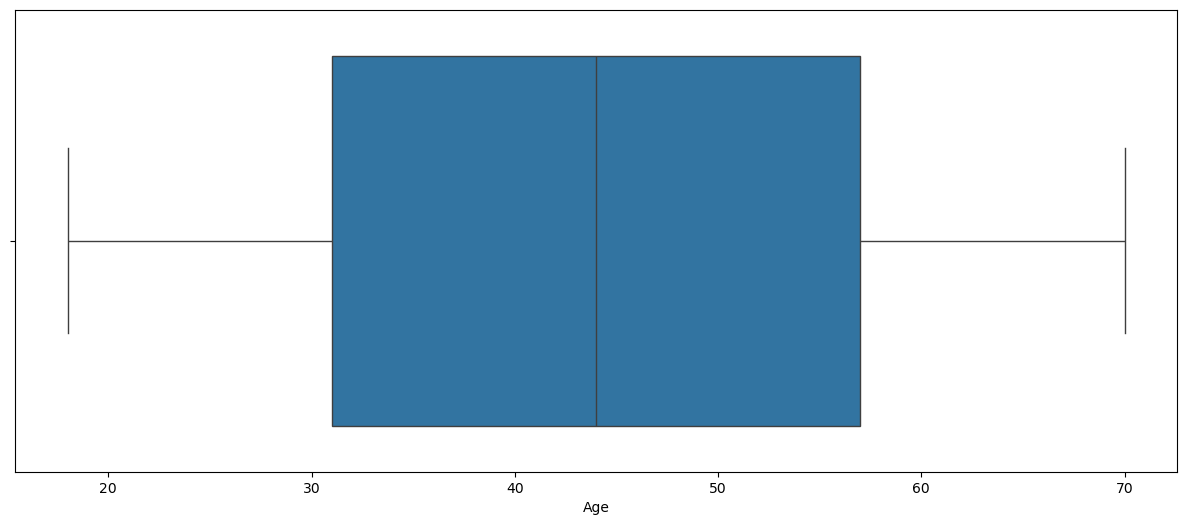

In [ ]:
# Also the age does not have any outlier visible from the boxplot
fig,ax = plt.subplots(figsize=(15,6))
sns.boxplot(data=data, x='Age')

<Axes: xlabel='Subscription_Length_Months', ylabel='Count'>

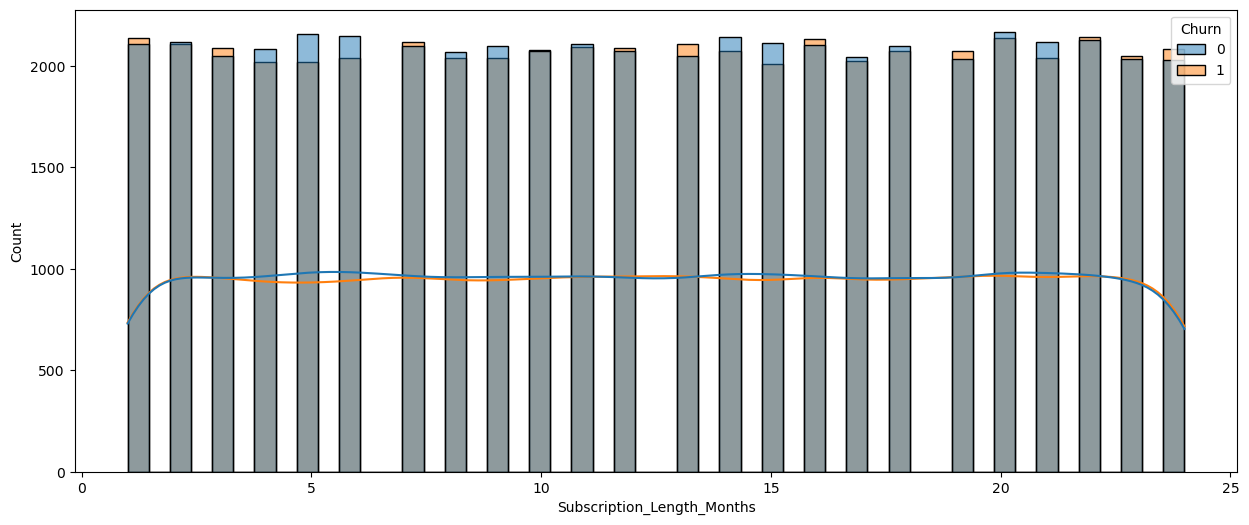

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data=data,x='Subscription_Length_Months', bins=50, kde=True,hue='Churn', ax=ax)

<Axes: xlabel='Subscription_Length_Months', ylabel='Age'>

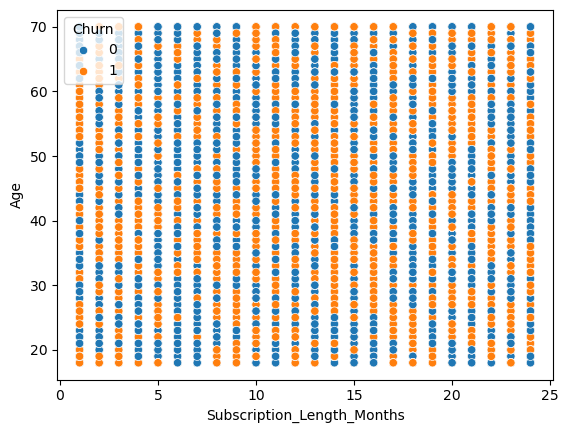

In [36]:
sns.scatterplot(data=data, x='Subscription_Length_Months', y='Age', hue='Churn')